# **Analisis Data E-Commerce**
###Studi Kasus : Analisis Menggunakan Dataset TheLook E-Commerce



**Pertanyaan bisnis yang akan dijawab:**

1. Berapa total pendapatan TheLook Ecommerce yang diterima?
2. Berapa jumlah customer yang dimiliki oleh TheLook Ecommerce?
3. Berapa jumlah order yang dimiliki oleh TheLook Ecommerce?
4. Berapa jumlah lost order opportunity yang dimliki TheLook Ecommerce?
5. Bagaimana tren pendapatan pertahun yang dimiliki TheLook Ecommerce?
6. Bagaimana performance traffic source yang dimiliki oleh TheLook Ecommerce?
7. Apa top 5 product category berdasarkan jumlah order TheLook Ecommerce?
8. Apa top 5 negara berdasarkan hasil pendapatan TheLook Ecommerce?

In [23]:
# Import data
import pandas as pd
ecom = pd.read_csv('/Dataset E-Commerce.csv')
ecom

,id,country,nama,email,order_id,order_date,traffic_source,category_product,nama_product,department_product,brand,age,gender,status_order,registered_date,revenue
0,9265,Brasil,Eric Phillips,ericphillips@example.org,11630,2022-12-31,Search,Sleep & Lounge,Tommy Bahama Men's Cotton Modal V Neck Shirt,Men,Tommy Bahama,60,M,Shipped,2022-09-10,100.0
1,9265,Brasil,Eric Phillips,ericphillips@example.org,11630,2022-12-31,Search,Fashion Hoodies & Sweatshirts,Ed Hardy Mens Smoking Brad Platinum Zip Up Hoo...,Men,Ed Hardy,60,M,Shipped,2022-09-10,160.0
2,9265,Brasil,Eric Phillips,ericphillips@example.org,11630,2022-12-31,Search,Suits & Sport Coats,Men's Single Breasted Two Button Olive Dress Suit,Men,Bolzano,60,M,Shipped,2022-09-10,280.0
3,9265,Brasil,Eric Phillips,ericphillips@example.org,11630,2022-12-31,Search,Outerwear & Coats,Arc'teryx Men's Atom SV Hoody,Men,Arc'teryx,60,M,Shipped,2022-09-10,1036.0
4,13554,Brasil,Brett Flores,brettflores@example.org,17026,2022-12-18,Email,Socks,Fruit of the Loom Men's 6-Pack Cushion Crew Sock,Men,Fruit of the Loom,50,M,Cancelled,2019-09-08,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42032,88693,United Kingdom,Bradley Johnson,bradleyjohnson@example.org,111077,2022-03-04,Search,Tops & Tees,Harriton Men's 6.5 oz. Ringspun Cotton Pique S...,Men,Harriton,69,M,Shipped,2020-05-05,24.0
42033,98575,United Kingdom,Alexandra Adams,alexandraadams@example.net,123259,2024-04-02,Search,Tops & Tees,Lucky Brand Women's Plus-Size Lexie Top,Women,Lucky Brand,44,F,Cancelled,2020-10-29,60.0
42034,98575,United Kingdom,Alexandra Adams,alexandraadams@example.net,123258,2022-02-07,Search,Maternity,Juicy Couture Maternity : Velour Pants - Regal,Women,Juicy Couture,44,F,Shipped,2020-10-29,100.0
42035,7021,United Kingdom,Rebecca Moore,rebeccamoore@example.com,8824,2024-04-26,Organic,Tops & Tees,Lucky Brand Women's Plus-Size Paisley Fux Wrap...,Women,Lucky Brand,35,F,Complete,2023-10-25,60.0


**Pertanyaan 1**

Berapa total pendapatan TheLook Ecommerce yang diterima?

In [24]:
ecom['revenue'].sum()

4697897.0

**Pertanyaan 2**

Berapa jumlah customer yang dimiliki oleh TheLook Ecommerce?

In [25]:
total_customers = ecom['nama'].nunique()
print(total_customers)

16660


**Pertanyaan 3**

Berapa jumlah order yang dimiliki oleh TheLook Ecommerce?

In [26]:
total_orders = ecom['order_id'].nunique()
print(total_orders)

29208


**Pertanyaan 4**

Berapa jumlah lost order opportunity yang dimliki TheLook Ecommerce?

In [27]:
ecom[(ecom['status_order']=='Cancelled') | (ecom['status_order']=='Returned')].status_order.value_counts()

,count
status_order,
Cancelled,6384
Returned,4299


**Pertanyaan 5**

Bagaimana tren pendapatan pertahun yang dimiliki TheLook Ecommerce?

*Catatan: untuk menjawab pertanyaan ini akan dibuat  plot*

In [28]:
#menginstall dan mengaktifkan library matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [29]:
##Mengekstrak tahun dalam kolom registered_date
# 1. Mengubah data type pada kolom registered_date
ecom['registered_date'] = pd.to_datetime(ecom['registered_date'])

# 2. Menambahkan kolom tahun berdasarkan kolom registered_date
ecom['tahun'] = ecom['registered_date'].dt.year

# 3. Melihat hasil ekstraksi
print(ecom[['registered_date', 'tahun']].head())

  registered_date  tahun
0      2022-09-10   2022
1      2022-09-10   2022
2      2022-09-10   2022
3      2022-09-10   2022
4      2019-09-08   2019


In [37]:
# Grouping data berdasarkan tahun dan menjumlahkan revenue di setiap tahun
ecom_per_year = ecom.groupby('tahun')['revenue'].sum().reset_index()
print(ecom_per_year)

   tahun   revenue
0   2019  855339.0
1   2020  838852.0
2   2021  865179.0
3   2022  840499.0
4   2023  791365.0
5   2024  506663.0


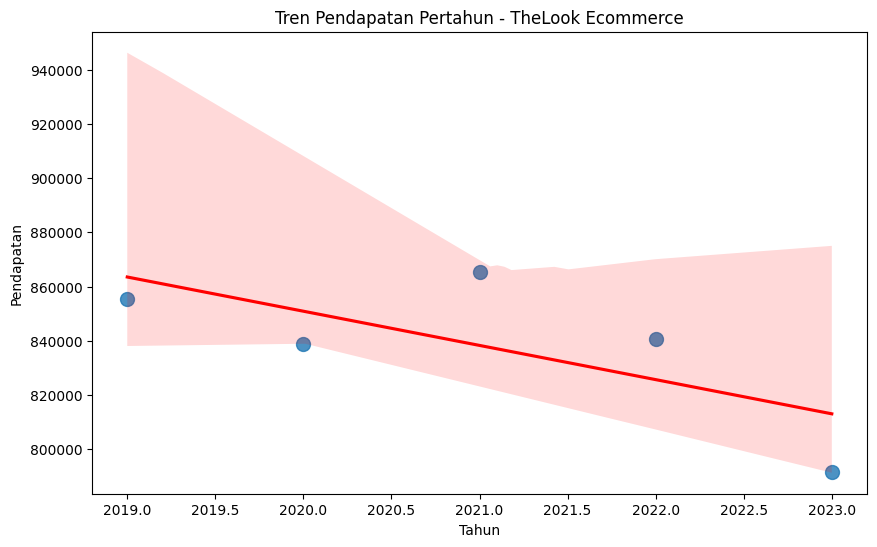

In [38]:
#Menyaring tahun hanya sampai 2023 saja karena 2024 belum usai
ecom_per_year_filtered = ecom_per_year[ecom_per_year['tahun'] <= 2023]

# Membuat plot
plt.figure(figsize=(10,6))
sns.regplot(x='tahun', y='revenue', data=ecom_per_year_filtered, scatter_kws={"s": 100}, line_kws={"color": "red"})
plt.title('Tren Pendapatan Pertahun - TheLook Ecommerce')
plt.xlabel('Tahun')
plt.ylabel('Pendapatan')

# Menampilkan plot
plt.show()

**Pertanyaan 6**

Bagaimana performance traffic source yang dimiliki oleh TheLook E-Commerce?

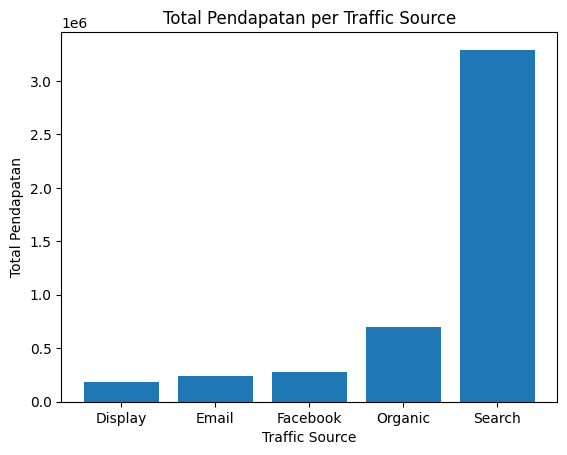

In [32]:
# Menghitung total pendapatan per traffic source
traffic_source = ecom.groupby('traffic_source')['revenue'].sum()

# Membuat bar chart
plt.bar(traffic_source.index, traffic_source.values)
plt.title('Total Pendapatan per Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Total Pendapatan')

# Menampilkan plot
plt.show()

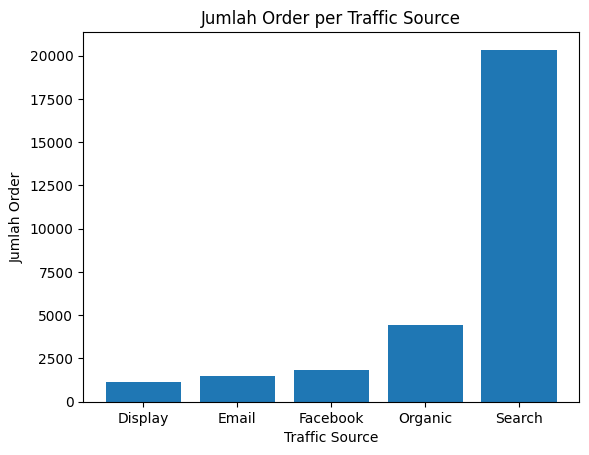

In [33]:
# Menghitung total jumlah order per traffic source
jumlah_order = ecom.groupby('traffic_source')['order_id'].nunique()

# Membuat bar chart
plt.bar(jumlah_order.index, jumlah_order.values)
plt.title('Jumlah Order per Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Jumlah Order')

# Menampilkan plot
plt.show()

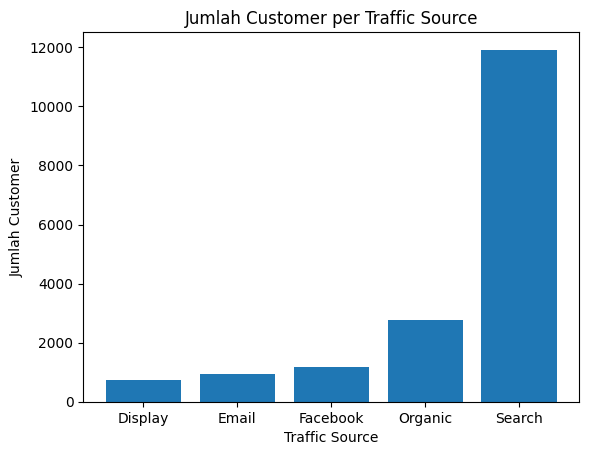

In [34]:
# Menghitung total jumlah customer per traffic source
jumlah_customer = ecom.groupby('traffic_source')['nama'].nunique()

# Membuat bar chart
plt.bar(jumlah_customer.index, jumlah_customer.values)
plt.title('Jumlah Customer per Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Jumlah Customer')

# Menampilkan plot
plt.show()

**Pertanyaan 7**

Apa top 5 product category berdasarkan jumlah order di TheLook Ecommerce?

In [35]:
top_product_categ = ecom['category_product'].value_counts()
top5 = top_product_categ.head(5)
top5

,count
category_product,
Intimates,3105
Jeans,2927
Tops & Tees,2743
Fashion Hoodies & Sweatshirts,2739
Sleep & Lounge,2627


**Pertanyaan 8**

Apa top 5 negara berdasarkan hasil pendapatan TheLook Ecommerce?

In [36]:
# Menghitung total pendapatan per negara
country_revenue = ecom.groupby('country')['revenue'].sum()

# Mengurutkan top 5 negara berdasarkan pendapatan terbanyak
top_5_countries = country_revenue.sort_values(ascending=False).head(5)

# Menampilkan hasil
top_5_countries


,revenue
country,
United States,1085099.0
Brasil,792651.0
China,681506.0
United Kingdom,678139.0
Spain,648705.0
